## **Background Subtraction**

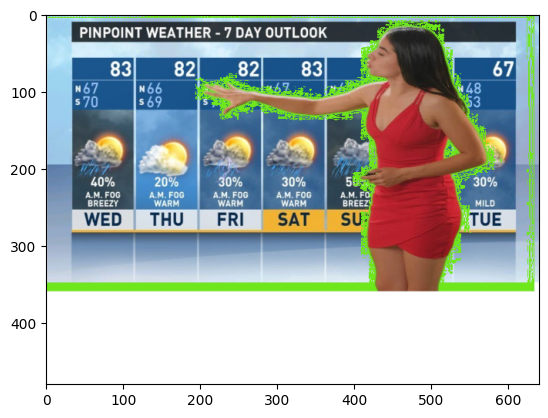

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_difference(bg_image,ob_image):
    difference_three_channel= np.abs(bg_image - ob_image)
    difference_single_channel= np.sum(difference_three_channel,axis=2)/3
    difference_single_channel= difference_single_channel.astype(np.uint8)
    return difference_single_channel

def compute_binarymask(difference_single_channel, threshold=10):
    difference_binary= np.where(difference_single_channel>=threshold,255,0)
    binary_binary=np.stack((difference_binary,)*3,axis=-1)
    return binary_binary

def replace_background(bg_image1, bg_image2, ob_image):
    difference_single_channel= compute_difference(bg_image1,ob_image)
    binary_mark= compute_binarymask(difference_single_channel)
    output= np.where(binary_mark==255, ob_image, bg_image2)
    return output


bg_image1=cv2.imread("bg1.jpg")
bg_image2=cv2.imread("bg2.jpg")
ob_image=cv2.imread("ob.jpg")

bg_image1=cv2.resize(bg_image1,(640,480))
bg_image2=cv2.resize(bg_image2,(640,480))
ob_image=cv2.resize(ob_image,(640,480))

bg_image1=cv2.cvtColor(bg_image1,cv2.COLOR_BGR2RGB)
bg_image2=cv2.cvtColor(bg_image2,cv2.COLOR_BGR2RGB)
ob_image=cv2.cvtColor(ob_image,cv2.COLOR_BGR2RGB)

output_image= replace_background(bg_image1, bg_image2, ob_image)

plt.imshow(output_image)
plt.show()





## **Chỉnh sáng - Crop ảnh**

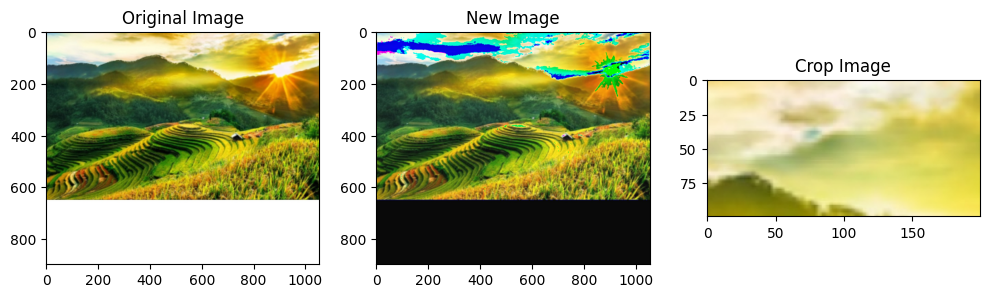

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img= cv2.imread('natur.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

new_img = img + 10
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)

crop_img = img[50:150, 500:700]

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(new_img)
plt.title('New Image')

plt.subplot(1,3,3)
plt.imshow(crop_img)
plt.title('Crop Image')

plt.tight_layout()

plt.show()

## **Cắt ảnh**